# Ensemble Learning

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mlp
import seaborn as sns
import re, pip, conda

d:\CODE\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
for package in [sklearn, mlp, np, pd, sns, pip, conda]:
    print(re.findall("([^']*)",str(package))[2],package.__version__)

sklearn 1.3.0
matplotlib 3.8.0
numpy 1.24.3
pandas 2.1.1
seaborn 0.12.2
pip 23.2.1
conda 23.10.0


In [ ]:
#pip install --upgrade scikit-learn
#conda update scikit-learn

---

- ### Ensenble Learning

Ensemble learning is one of the most advanced, effective, and research-worthy fields in machine learning. This type of method trains multiple weak estimators (base estimators) and converts their output results in some way. Combined to solve a problem.

- Three main research areas
- - **Model Fusion**
     Model fusion was originally called "classifier combination". This field mainly focused on strong evaluators, trying to design powerful rules to fuse the results of strong classifiers to obtain better fusion results. Methods in this field mainly include voting, stacking, blending, etc., and the fused model needs to be a strong classifier.
- - **Weak Classifier Ensemble**
     Weak classifier integration mainly focuses on the integration of traditional machine learning algorithms. This field covers most of the integration algorithms and integration methods we are familiar with, such as bagging and boosting. This field attempts to design powerful ensemble algorithms to improve multiple weak learners into strong learners. 
- - **mixture of experts** (mixture of experts)
     Mixed expert models often appear in the field of deep learning (neural networks). In other integration fields, different learners are trained on the same task or even on the same data, but in the hybrid expert model, we decompose a complex task into several relatively simple and smaller subtasks. Individual learners (experts) are then trained for different subtasks, and the results of these individual learners are then combined to derive the final output.

---

- ### Bagging

It is one of the most famous, simplest, and most effective operations among all ensemble learning methods.

In bagging, we build multiple weak estimator (usually decision trees, but also other nonlinear algorithms) in parallel, and combine the results of multiple weak estimator for output. When the goal of the ensemble algorithm is a regression task, the output result of the ensemble algorithm is the average of the results output by the weak evaluator. When the goal of the ensemble algorithm is a classification task, the output result of the ensemble algorithm is the result output by the weak evaluator. The minority obeys the majority.

|Bagging算法|集成类|
|:--:|:--:|
|随机森林分类|RandmForestClassifier|
|随机森林回归|RandomForestRegressor|
|极端随机树分类|ExtraTreesClassifier|
|极端随机树回归|ExtraTreesRegressor|
|装袋法分类|BaggingClassifier|
|装袋法回归|BaggingRegressor|

---

- ### RandomForest

**Randomly sample different subsets from the provided data to build multiple different decision trees, and integrate the results of a single decision tree according to the rules of bagging (average for regression, minority obeys the majority for classification) , random forest is often the first algorithm we try on small and medium-sized data.**

- - RandomForestRegressor

In [2]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import cross_validate, KFold

In [6]:
data = pd.read_csv(r"D:\Practice\Machine Learning\datasets\House Price\train_encode.csv", index_col=0)

In [5]:
data.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态,SalePrice
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0,208500
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0,181500
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0,223500
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,140000
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0,250000


In [5]:
data.shape

NameError: name 'data' is not defined

In [7]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [8]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [9]:
y.mean()

180921.19589041095

In [10]:
X.shape

(1460, 80)

In [11]:
X.columns.tolist()

['Id',
 '住宅类型',
 '住宅区域',
 '街道接触面积(英尺)',
 '住宅面积',
 '街道路面状况',
 '巷子路面状况',
 '住宅形状(大概)',
 '住宅现状',
 '水电气',
 '住宅配置',
 '住宅视野',
 '社区',
 '住宅周边1',
 '住宅周边2',
 '适用家庭',
 '住宅房型',
 '装修质量',
 '整体质量',
 '建造年份',
 '法律拆除年份',
 '天花板类型',
 '天花板材料',
 '户外装饰1',
 '户外装饰2',
 '砖墙类型',
 '砖墙面积',
 '户外材料质量',
 '户外装修质量',
 '地下室类型',
 '地下室深度',
 '地下室质量',
 '花园外墙',
 '地下室现状1',
 '地下室一层标准面积',
 '地下室现状2',
 '地下室二层标准面积',
 '地下室建造现状',
 '整体地下室面积',
 '暖气类型',
 '暖气质量',
 '中央空调',
 '电力系统',
 '二楼面积',
 '三楼面积',
 '全低质量面积',
 '户外活动空间面积',
 '全卫地下室',
 '半卫地下室',
 '全卫及以上',
 '半卫及以上',
 '卧室及以上',
 '厨房及以上',
 '厨房质量',
 '总房间量',
 '住宅性能',
 '壁炉数量',
 '壁炉质量',
 '车库类型',
 '车库建造时间',
 '车库装修现状',
 '车位数量',
 '车库面积',
 '车库质量',
 '车库现状',
 '石板路',
 '木板面积',
 '开放式门廊面积',
 '关闭式门廊面积',
 '三季门廊面积',
 '半开放式门廊面积',
 '泳池面积',
 '泳池质量',
 '篱笆质量',
 '其他配置',
 '其他配置的价值',
 '销售月份',
 '销售年份',
 '销售类型',
 '销售状态']

In [12]:
reg_f = RFR()
reg_t = DTR()
cv = KFold(n_splits=5, shuffle=True, random_state=21)

|cross_validate|参数|
|---|---|
|n_jobs|允许该程序调用的线程数|
|verbose|是否打印进度|

In [14]:
result_t = cross_validate(reg_t,
                          X, y,
                          cv=cv,
                          scoring="neg_mean_squared_error",
                          return_train_score=True,
                          verbose=True,
                          n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished


> 12 线程Using backend LokyBackend with 12 concurrent workers 

In [16]:
result_f = cross_validate(reg_f,X,y,cv=cv,scoring="neg_mean_squared_error"
                          ,return_train_score=True
                          ,verbose=True
                          ,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.9s finished


In [15]:
result_t # overfitting

{'fit_time': array([0.09904909, 0.09904909, 0.10006952, 0.09374547, 0.10227728]),
 'score_time': array([0.01566029, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([-1.57517902e+09, -2.26371485e+09, -1.69274844e+09, -1.56489595e+09,
        -1.65591423e+09]),
 'train_score': array([-0., -0., -0., -0., -0.])}

In [17]:
result_f 

{'fit_time': array([5.63731813, 5.78019619, 5.8754096 , 5.98113656, 5.78019619]),
 'score_time': array([0.02687645, 0.02677584, 0.02122712, 0.02356911, 0.02677584]),
 'test_score': array([-1.06859873e+09, -1.15568711e+09, -8.27318481e+08, -4.99893293e+08,
        -7.63794686e+08]),
 'train_score': array([-1.14210468e+08, -1.25035768e+08, -1.15787334e+08, -1.28594312e+08,
        -1.42540730e+08])}

**In ensemble learning, our indicator for measuring regression algorithms is generally RMSE (root mean square error), which is the result of taking the square root of MSE**. The labels of real data are often huge and the amount of data is complex. MSE as a square result will amplify the error in real data (such as the results obtained in the random forest results, $7*10^8$, etc.), so we will root the results. let the evaluation indicators of regression algorithms not be too exaggerated in value. Similarly, the variance, as a squared result, will be too large on real data, so if possible, we use the standard deviation to measure model stability.

In [18]:
trainRMSE_f = abs(result_f["train_score"])**0.5
testRMSE_f = abs(result_f["test_score"])**0.5
trainRMSE_t = abs(result_t["train_score"])**0.5
testRMSE_t = abs(result_t["test_score"])**0.5

In [20]:
trainRMSE_f.mean(), testRMSE_f.mean(), trainRMSE_f.std() 

(11181.661375699874, 29088.620097906263, 451.8529542451099)

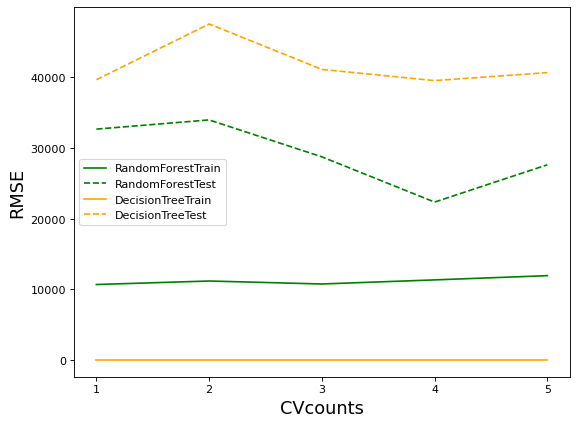

In [22]:
xaxis = range(1, 6)
plt.figure(figsize=(8, 6), dpi=80)

plt.plot(xaxis,trainRMSE_f,color="green",label = "RandomForestTrain")
plt.plot(xaxis,testRMSE_f,color="green",linestyle="--",label = "RandomForestTest")
plt.plot(xaxis,trainRMSE_t,color="orange",label = "DecisionTreeTrain")
plt.plot(xaxis,testRMSE_t,color="orange",linestyle="--",label = "DecisionTreeTest")
plt.xticks([1,2,3,4,5])
plt.xlabel("CVcounts", fontsize=16)
plt.ylabel("RMSE", fontsize=16)
plt.legend()
# plt.show()

|类型|参数|
|---|---|
|**弱分类器数量**|**<font color="green">n_estimators</font>**|
|**弱分类器的训练数据**|**<font color="green">bootstrap, oob_score, max_samples</font>**, max_features, random_state|
|**弱分类器结构**|criterion, max_depth, min_samples_split, <br>min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes,<br>min_impurity_decrease|
|**其他**|n_jobs, verbose, ccp_alpha|
|类型|参数|
|----|----|
|**弱分类器结构**|criterion：弱评估器分枝时的不纯度衡量指标<br><br>max_depth：弱评估器被允许的最大深度，默认None<br><br>min_samples_split：弱评估器分枝时，父节点上最少要拥有的样本个数<br><br>min_samples_leaf：弱评估器的叶子节点上最少要拥有的样本个数<br><br>min_weight_fraction_leaf：当样本权重被调整时，叶子节点上最少要拥有的样本权重<br><br>max_leaf_nodes：弱评估器上最多可以有的叶子节点数量<br><br>min_impurity_decrease：弱评估器分枝时允许的最小不纯度下降量|

> criterion与feature_importances_

regression criterion: "squared_error"（平方误差），"absolute_error"（绝对误差）& "poisson"（泊松偏差）。对任意样本$i$而言，$y_i$为真实标签，$\hat{y_i}$为预测标签，则各个criterion的表达式为：

平方误差：$\sum{(y_i - \hat{y_i})^2}$<br><br>
绝对误差：$\sum{|y_i - \hat{y_i}|}$<br><br>
泊松偏差：$2\sum{(y_ilog(\frac{y_i}{\hat{y_i}})-(y_i - \hat{y_i}))}$

平方误差比绝对误差更敏感（类似于信息熵比基尼系数更敏感），并且在计算上平方误差比绝对误差快很多。泊松偏差则是适用于一个特殊场景的：当需要预测的标签全部为正整数时，标签的分布可以被认为是类似于泊松分布的。正整数预测在实际应用中非常常见，比如预测点击量、预测客户/离职人数、预测销售量等。我们现在正在使用的数据（房价预测），也可能比较适合于泊松偏差。


- Adjust tree structure to control overfitting

>max_depth

The roughest pruning method, from the perspective of the tree structure, is the parameter that has the greatest impact on the random forest's ability to resist overfitting. The default value of max_depth is None, which means there is no depth limit. Therefore, choosing a small max_depth can be effective when random forests behave like overfitting.

> max_leaf_nodes and min_sample_split

A more refined branch reduction method than max_depth, but it limits the number of leaves and branches, allowing both fine-tuning and drastic pruning. The default value of max_leaf_nodes is None, which means there is no limit on the number of leaves. The default value of min_sample_split is 2, which is equivalent to not limiting branches.

> min_impurity_decrease

The most sophisticated method of branch reduction can reduce the corresponding leaves according to the degree of impurity reduction. The default value is 0, so it is a fairly generous parameter.

> n_estimators

n_estimators is the number of trees in the forest, that is, the number of weak estimators. The default is 100 in sklearn. It is the only parameter that is required for random forests. **n_estimators have a great impact on the accuracy, complexity, learning ability, overfitting, required calculations and calculation time of the random forest model. Therefore, n_estimators are often the first thing we need when adjusting the random forest. Confirmed parameters**. For a single decision tree, the model complexity is determined by the tree structure (tree depth, tree width, number of leaves on the tree, etc.) and the amount of data (sample size, feature amount), while for a random forest, the model complexity is determined by The number of trees in the forest, the tree structure and the amount of data are determined. The greater the number of trees, the more complex the model.

Remember the image we drew when explaining decision trees and logistic regression? When the model complexity increases, the model's generalization ability will first increase and then decrease (the relative generalization error will first decrease and then increase). We need to find the complexity with the best model generalization ability. **In actual training, the optimal complexity is often an obvious turning point**. When the complexity is higher than the optimal complexity, the generalization error of the model either starts to rise or stops declining.

<img src="https://tva1.sinaimg.cn/large/008i3skNly1gs3wqah1w2j30pu0iaadu.jpg" alt="1" style="zoom:33%;" />

For random forests, the abscissa of the image can be seamlessly switched to the value on the parameter n_estimators. When n_estimators is larger:
- As the complexity of the model increases, generalization can first increase and then weaken (or remain unchanged)
- The learning ability of the model is getting stronger and stronger, the score on the training set may be getting higher and higher, and the risk of over-fitting is getting higher and higher.
- Models require more and more computing power and memory
- Model training will take longer and longer

Therefore, when adjusting n_estimators, we are always eager to strike a balance between model effect and training difficulty. At the same time, we also need to use cross-validation to keep an eye on model overfitting. In the current version of sklearn, the default value of n_estimators is 100, and the number of n_estimators that a personal computer can tolerate is about 200~1000.

In [3]:
def RMSE(cvresult,key):
    return (abs(cvresult[key])**0.5).mean()

In [8]:
reg_f = RFR(n_estimators=3)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)
result_f = cross_validate(reg_f,X,y,cv=cv,scoring="neg_mean_squared_error"
                          ,return_train_score=True
                          ,verbose=True
                          ,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished


In [9]:
RMSE(result_f,"test_score")

36574.420876773256

In [10]:
reg_f = RFR(n_estimators=50)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)
result_f = cross_validate(reg_f,X,y,cv=cv,scoring="neg_mean_squared_error"
                          ,return_train_score=True
                          ,verbose=True
                          ,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished


In [11]:
RMSE(result_f,"test_score")

30595.647078575817

In [12]:
reg_f = RFR(n_estimators=300)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)
result_f = cross_validate(reg_f,X,y,cv=cv,scoring="neg_mean_squared_error"
                          ,return_train_score=True
                          ,verbose=True
                          ,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.5s finished


In [13]:
RMSE(result_f,"test_score")

30237.3178442212

- Random sampling of samples
> bootstrap，oob_score，max_samples

**The input of the bootstrap parameter is a Boolean value, and the default is True, which controls whether the data is randomly sampled before each decision tree is established**. If set to False, it means that all samples are used to build the tree each time. If it is True, the tree is randomly sampled to build the tree. From a linguistic sense, `bootstrap` can refer to any type of random sampling, but in random forests it specifically refers to **random sampling with replacement**.
![RF3](https://pictes.oss-cn-beijing.aliyuncs.com/%E5%BE%AE%E8%AF%BE%20-%20sklearn/RFC/RF3.png)
As shown in the figure below, in an original training set containing m samples, we perform random sampling. Sample one sample each time, and put the sample back into the original training set before extracting the next sample. That is to say, the sample may still be collected the next time you sample. In this way, max_samples is collected several times, and finally we get A bootstrap set composed of `max_samples` samples.
**When the number of samples is enough and the original data set is large enough**

$$
1-(1-\frac{1}{m})^{max\_samples}
$$

- random sampling of features
> max_features

> Enter an integer, indicating that max_features features are randomly selected for each branch<br>
> Enter a floating point number, which means that round(max_features * n_features) features are extracted for each branch<br>
> Enter "auto" or None to use all features n_features<br> for each branch
> Enter "sqrt" to use sqrt(n_features)<br> for each branch
> Enter "log2", which means log2(n_features) is used for each branch<br>

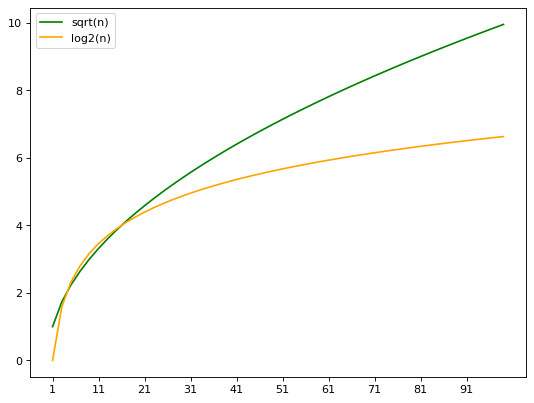

In [14]:
sqrt_ = []
log_ = []
for n_features in range(1,101,2):
    sqrt_.append(np.sqrt(n_features))
    log_.append(np.log2(n_features))    
xaxis = range(1,101,2)
plt.figure(figsize=(8,6),dpi=80)
#RMSE
plt.plot(xaxis,sqrt_,color="green",label = "sqrt(n)")
plt.plot(xaxis,log_,color="orange",label = "log2(n)")
plt.xticks(range(1,101,10))
plt.legend()
plt.show()

- random sampling pattern
> random_state

|Type|Parameters|
|---|---|
|**Training data for weak classifier**|<font color="green">**bootstrap**</font>: Whether to randomly sample samples<br><br><font color="green"> **oob_score**</font>: If random sampling is used, whether to use out-of-bag data as the validation set<br><br><font color="green">**max_samples**</font>: If random sampling is used Sampling, the sample size of each random sampling<br><br>max_features: the number of randomly selected features<br><br>random_state: controls all random modes|

|Type|Parameters|
|---|---|
|**Other**|n_jobs: The number of threads allowed to be called<br><br>verbose: Print the tree building process<br><br>ccp_alpha: The coefficient on the structural risk widetilde, which can be used Control overfitting<br><br>warm_start: Support incremental learning|

---

- ### Parameter space and grid optimization

|Influence|Parameters|
|:-:|:-:|
|⭐⭐⭐⭐⭐<br>Almost always hugely influential|n_estimators (overall learning ability)<br>max_depth (rough pruning)<br>max_features (randomness)|
|⭐⭐⭐⭐<br>Influential most of the time|max_samples (randomness)<br>class_weight (sample balance)|
|⭐⭐<br>May have great influence<br>Most of the time the influence is not obvious|min_samples_split (fine pruning)<br>min_impurity_decrease (fine pruning)<br>max_leaf_nodes (fine pruning)<br>criterion (branch sensitivity) |
|⭐<br>When the amount of data is large enough, there is almost no impact|random_state<br>ccp_alpha (structural risk)|

In [16]:
Option = [1,*range(5,51,5)]
#Option = [1,*range(5,101,5)]

trainRMSE = np.array([])
testRMSE = np.array([])
trainSTD = np.array([])
testSTD = np.array([])

for n_estimators in Option:

    reg_f = RFR(n_estimators=n_estimators,random_state=1412)
    
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    result_f = cross_validate(reg_f,X,y,cv=cv,scoring="neg_mean_squared_error"
                              ,return_train_score=True
                              ,n_jobs=-1)
    
    train = abs(result_f["train_score"])**0.5
    test = abs(result_f["test_score"])**0.5
    
    trainRMSE = np.append(trainRMSE,train.mean()) 
    testRMSE = np.append(testRMSE,test.mean())
    trainSTD = np.append(trainSTD,train.std()) 
    testSTD = np.append(testSTD,test.std())

In [17]:
def plotCVresult(Option,trainRMSE,testRMSE,trainSTD,testSTD):
    xaxis = Option
    plt.figure(figsize=(8,6),dpi=80)

    #RMSE
    plt.plot(xaxis,trainRMSE,color="k",label = "RandomForestTrain")
    plt.plot(xaxis,testRMSE,color="red",label = "RandomForestTest")

    #STD - 围绕在RMSE旁形成一个区间
    plt.plot(xaxis,trainRMSE+trainSTD,color="k",linestyle="dotted")
    plt.plot(xaxis,trainRMSE-trainSTD,color="k",linestyle="dotted")
    plt.plot(xaxis,testRMSE+testSTD,color="red",linestyle="dotted")
    plt.plot(xaxis,testRMSE-testSTD,color="red",linestyle="dotted")
    plt.xticks([*xaxis])
    plt.legend(loc=1)
    plt.show()

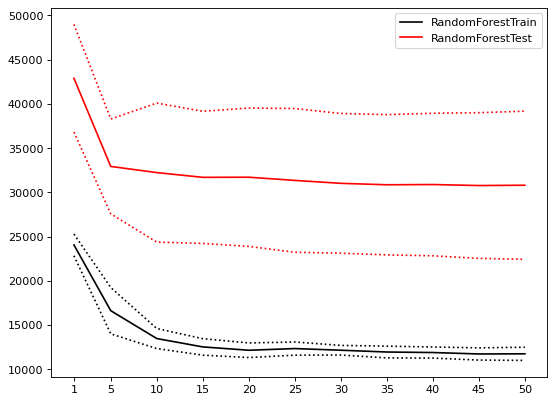

In [18]:
plotCVresult(Option,trainRMSE,testRMSE,trainSTD,testSTD)

When plotting a learning curve, we can easily find the turning point where the generalization error starts to rise, or changes to a plateauing trend. Therefore, we can choose the value of n_estimators at or near the turning point, such as 20. However, n_estimators are affected by other parameters, such as:

> - When the structure of a single decision tree is simpler (when relying on pruning), more trees may be needed
> - When the data for training a single decision tree is simpler (when relying on randomness), more trees may be needed

Therefore, the parameter space of n_estimators can be determined as range(20,100,5), or even range(15,25,5) if you are more conservative.

- Decision tree object Tree

In [19]:
reg_f = RFR(n_estimators=10,random_state=1412)
reg_f = reg_f.fit(X,y) # randomforest

In [20]:
reg_f.estimators_ #each tree in forest

[DecisionTreeRegressor(max_features=1.0, random_state=1630984966),
 DecisionTreeRegressor(max_features=1.0, random_state=472863509),
 DecisionTreeRegressor(max_features=1.0, random_state=1082704530),
 DecisionTreeRegressor(max_features=1.0, random_state=1930362544),
 DecisionTreeRegressor(max_features=1.0, random_state=273973624),
 DecisionTreeRegressor(max_features=1.0, random_state=21991934),
 DecisionTreeRegressor(max_features=1.0, random_state=1886585710),
 DecisionTreeRegressor(max_features=1.0, random_state=63725675),
 DecisionTreeRegressor(max_features=1.0, random_state=1374343434),
 DecisionTreeRegressor(max_features=1.0, random_state=1078007175)]

In [21]:
reg_f.estimators_[0], reg_f.estimators_[0].tree_

(DecisionTreeRegressor(max_features=1.0, random_state=1630984966),
 <sklearn.tree._tree.Tree at 0x231b1e8a170>)

In [22]:
reg_f.estimators_[0].tree_.max_depth 

19

In [23]:
for t in reg_f.estimators_:
    print(t.tree_.max_depth)

19
25
27
20
23
22
22
20
22
24


In [25]:
reg_f = RFR(n_estimators=50,random_state=21)
reg_f = reg_f.fit(X,y) 
d = pd.Series([],dtype="int64")
for idx,t in enumerate(reg_f.estimators_):
    d[idx] = t.tree_.max_depth

In [26]:
d.mean()

21.88

In [27]:
d.describe()

count    50.000000
mean     21.880000
std       1.858681
min      18.000000
25%      20.000000
50%      22.000000
75%      23.000000
max      25.000000
dtype: float64

> Assuming that your random forest is overfitting now, it will be more effective to set the maximum depth range of max_depth between [15,25]. If we want to prune vigorously, it can be set between [10,15].

> Similarly, we can also call other properties to assist us in adjusting parameters:

|Parameters|Parameter meaning|Corresponding attributes|Attribute meaning|
|:-:|:-:|:-:|:-:|
|n_estimators|Number of trees|reg.estimators_|All tree objects in the forest|
|max_depth|Maximum depth allowed|.tree_.max_depth|Actual depth of tree No. 0|
|max_leaf_nodes|Maximum number of <br>leaf nodes allowed|.tree_.node_count|The actual total number of nodes in tree No. 0|
|min_sample_split|Minimum<br>sample size required for branches|.tree_.n_node_samples|Actual sample size on each leaf of tree No. 0|
|min_weight_fraction_leaf|Minimum<br>sample weight required for branches|tree_.weighted_n_node_samples|The actual sample weight on each leaf of tree No. 0|
|min_impurity_decrease|Minimum<br>impurity decrease required for branches|.tree_.impurity<br>.tree_.threshold|Actual impurity on each leaf of tree 0<br>Branch of each node of tree 0 Post-impurity reduction |

In [28]:
reg_f.estimators_[0].tree_.node_count

1779

In [29]:
for t in reg_f.estimators_:
    print(t.tree_.node_count)

1779
1723
1751
1757
1799
1779
1785
1749
1765
1763
1757
1749
1795
1771
1779
1791
1785
1765
1807
1793
1773
1775
1739
1787
1781
1805
1797
1749
1793
1781
1751
1759
1825
1777
1765
1735
1741
1795
1739
1791
1795
1775
1813
1779
1765
1805
1705
1749
1791
1777


**According to experience, when the decision tree does not reduce branches and the prediction results on the training set are good, the number of leaves on a tree is often equal to or more than the sample size. The worse the algorithm results, the fewer the number of leaves.**, if the RMSE is very high or the R2 is very low, you can consider using half or 3/4 of the sample size as a reference for the amount of leaves without branch reduction.

In [30]:
#The amount of impurity decrease on each node. If it is -2
#it means that the node is a leaf node.
reg_f.estimators_[0].tree_.threshold.tolist()[:20]

[6.5,
 346.5,
 271.5,
 43.5,
 84.5,
 1.5,
 5.5,
 1.0,
 34.0,
 -2.0,
 2.0,
 -2.0,
 2.0,
 -2.0,
 -2.0,
 102.5,
 -2.0,
 0.5,
 -2.0,
 -2.0]

In [31]:
#How to know how many leaves will be cut off
#by setting the range of min_impurity_decrease?
pd.Series(reg_f.estimators_[0].tree_.threshold).value_counts().sort_index()

-2.0       890
 0.5        58
 1.0        22
 1.5        63
 2.0        49
          ... 
 1230.0      1
 1234.0      1
 1240.5      1
 1336.0      1
 1364.0      1
Name: count, Length: 393, dtype: int64

In [32]:
pd.set_option("display.max_rows",None)
np.cumsum(pd.Series(reg_f.estimators_[0].tree_.threshold).value_counts().sort_index()[1:])

C:\Users\25420\AppData\Local\Temp\ipykernel_31632\4109650085.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  np.cumsum(pd.Series(reg_f.estimators_[0].tree_.threshold).value_counts().sort_index()[1:])


1.0        22
1.5        85
2.0       134
2.5       174
3.0       191
3.5       226
4.0       234
4.5       261
5.0       267
5.5       285
6.0       288
6.5       293
7.0       303
7.5       308
8.0       315
8.5       319
9.0       325
9.5       327
10.0      330
10.5      339
11.0      343
11.5      347
12.0      350
12.5      354
13.0      355
13.5      358
14.0      361
14.5      364
15.0      365
15.5      366
16.0      369
17.5      370
18.0      371
18.5      372
19.0      377
19.5      379
20.0      380
20.5      383
21.0      385
21.5      387
22.0      389
22.5      390
23.5      392
24.0      393
24.5      395
25.0      398
25.5      400
26.0      401
27.5      402
28.0      404
29.5      406
30.0      407
31.0      408
31.5      411
32.0      412
32.5      413
33.0      416
33.5      417
34.0      419
35.0      420
35.5      422
36.0      423
36.5      425
37.0      427
38.0      428
38.5      429
39.0      430
40.5      432
41.0      433
41.5      434
42.0      435
43.0  

In [33]:
#How to set the range of 
#min_sample_split so that many leaves will be cut off?
np.bincount(reg_f.estimators_[0].tree_.n_node_samples.tolist())[:10]

array([  0, 854, 322, 146,  82,  59,  45,  31,  22,  17], dtype=int64)

In [34]:
from sklearn.tree._tree import Tree
type(Tree),help(Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

(type, None)

- Use grid search to tune parameters on random forests

|Influence|Parameters|
|:-:|:-:|
|⭐⭐⭐⭐⭐<br>Almost always hugely influential|n_estimators (overall learning ability)<br>max_depth (rough pruning)<br>max_features (randomness)<br>|
|⭐⭐⭐⭐<br>Influential most of the time|max_samples (randomness)<br>class_weight (sample balance)|
|⭐⭐<br>May have great influence<br>Most of the time the influence is not obvious|min_samples_split (fine pruning)<br>min_impurity_decrease (fine pruning)<br>max_leaf_nodes (fine pruning)<br>criterion (branch sensitivity) |
|⭐<br>When the amount of data is large enough, there is almost no impact|random_state<br>ccp_alpha (structural risk)|

model is over-fitting and needs to resist over-fitting, and the overall data volume is not very large, so the proportion of random sampling should not be reduced, so we select the following five parameters for search: `n_estimators`, `max_depth`, `max_features`, `min_impurity_decrease`, `criterion`.

In [35]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mlp
import matplotlib.pyplot as plt
import time 
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import cross_validate, KFold, GridSearchCV

In [36]:
def RMSE(cvresult,key):
    return (abs(cvresult[key])**0.5).mean()

In [37]:
data = pd.read_csv(r"D:\Practice\Machine Learning\datasets\House Price\train_encode.csv", index_col=0)

In [38]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [39]:
X.shape

(1460, 80)

In [40]:
X.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,半开放式门廊面积,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0


In [41]:
#Bench mark
reg = RFR(random_state=1412)
cv = KFold(n_splits=5,shuffle=True,random_state=21)

result_pre_adjusted = cross_validate(reg,X,y,cv=cv,scoring="neg_mean_squared_error"
                          ,return_train_score=True
                          ,verbose=True
                          ,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.5s finished


In [42]:
RMSE(result_pre_adjusted,"train_score")

11300.9841664023

In [43]:
RMSE(result_pre_adjusted,"test_score")

29390.160558196938

In [ ]:
param_grid_simple = {"criterion": ["squared_error","poisson"]
                     , 'n_estimators': [*range(20,100,5)]
                     , 'max_depth': [*range(10,25,2)]
                     , "max_features": ["log2","sqrt",16,32,64,"auto"]
                     , "min_impurity_decrease": [*np.arange(0,5,10)]
                    }

In [ ]:
#n_jobs=8,verbose=True
reg = RFR(random_state=1412,verbose=True,n_jobs=-1)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)
search = GridSearchCV(estimator=reg
                     ,param_grid=param_grid_simple
                     ,scoring = "neg_mean_squared_error"
                     ,verbose = True
                     ,cv = cv
                     ,n_jobs=-1)

In [ ]:
start = time.time()
search.fit(X,y)
print(time.time() - start)

In [ ]:
search.best_estimator_

---

- ### Incremental learning <br>of random forest on huge amounts of data

- deneral

In [44]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

In [45]:
X_fc = fetch_california_housing().data
y_fc = fetch_california_housing().target

In [46]:
X_fc.shape

(20640, 8)

In [50]:
model = RFR(n_estimators=3, warm_start=False) # no incremental learning
model1 = model.fit(X_fc, y_fc)

In [51]:
#RMSE
(mean_squared_error(y_fc, model.predict(X_fc)))**0.5

0.2962129293073116

In [53]:
model1.estimator_, model1.estimators_

(DecisionTreeRegressor(),
 [DecisionTreeRegressor(max_features=1.0, random_state=997676964),
  DecisionTreeRegressor(max_features=1.0, random_state=1841328192),
  DecisionTreeRegressor(max_features=1.0, random_state=80703818)])

In [55]:
model1 = model1.fit(X.iloc[:,:8],y)
model1.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=1135758142),
 DecisionTreeRegressor(max_features=1.0, random_state=265323579),
 DecisionTreeRegressor(max_features=1.0, random_state=621046299)]

In [56]:
#RMSE with new tree
(mean_squared_error(y_fc,model1.predict(X_fc)))**0.5

d:\CODE\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


204542.70586041128

In [57]:
model = RFR(n_estimators=3, warm_start=True) #with incremental learning

In [58]:
model2 = model.fit(X_fc, y_fc)

In [59]:
(mean_squared_error(y_fc,model2.predict(X_fc)))**0.5

0.29949356129637145

In [60]:
model2.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=1559698670),
 DecisionTreeRegressor(max_features=1.0, random_state=2056320228),
 DecisionTreeRegressor(max_features=1.0, random_state=79787785)]

In [61]:
model2 = model2.fit(X.iloc[:,:8],y)

d:\CODE\Lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [62]:
(mean_squared_error(y_fc,model2.predict(X_fc)))**0.5

d:\CODE\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.29949356129637145

In [63]:
model2.estimators_ # same trees

[DecisionTreeRegressor(max_features=1.0, random_state=1559698670),
 DecisionTreeRegressor(max_features=1.0, random_state=2056320228),
 DecisionTreeRegressor(max_features=1.0, random_state=79787785)]

In [64]:
model2.n_estimators += 2

In [65]:
model2

RandomForestRegressor(n_estimators=5, warm_start=True)

In [66]:
model2.fit(X.iloc[:,:8],y)

RandomForestRegressor(n_estimators=5, warm_start=True)

In [67]:
model2.estimators_ #原来的树还是没有变化，新增的树是基于新输入的数据进行训练的

[DecisionTreeRegressor(max_features=1.0, random_state=1559698670),
 DecisionTreeRegressor(max_features=1.0, random_state=2056320228),
 DecisionTreeRegressor(max_features=1.0, random_state=79787785),
 DecisionTreeRegressor(max_features=1.0, random_state=1500668715),
 DecisionTreeRegressor(max_features=1.0, random_state=166345949)]

---

- ### Application of incremental learning on Kaggle data

https://www.kaggle.com/tunguz/big-five-personality-test

In [68]:
trainpath = r"D:\Practice\Machine Learning\datasets\Big data\bigdata_train.csv"
testpath = r"D:\Practice\Machine Learning\datasets\Big data\bigdata_test.csv"

When we decide to use incremental learning, the data should be so huge that it is impossible to directly open and view, impossible to directly train, or even impossible to directly import (for example, more than 20 G). But if we need to circularly import data, we must know the approximate actual amount of data, so we can obtain the amount of data in the csv that cannot be opened in the following ways:

- If it is a kaggle data set, we can generally find the corresponding instructions on their webpage
- If it is a database data set, statistics can be performed in the database
- If you cannot find the corresponding instructions, you can use the deque library to import the last few lines of the csv file and view the index
- If the data does not have an index, you can only rely on pandas to try to find the approximate data range.

In [70]:
from collections import deque 
from io import StringIO

In [71]:
with open(trainpath, 'r') as data:
    q = deque(data, 5)

In [72]:
q

deque(['995029,3.0,3.0,5.0,5.0,2.0,3.0,2.0,5.0,5.0,5.0,2.0,2.0,4.0,4.0,1.0,1.0,2.0,4.0,4.0,2.0,4.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,4.0,5.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,1.0,2.0,5.0,3.0,3.0,3.0,1.0,3.0,4.0,5.0,2.0,5.0,3.0,82719.0,5474.0,7131.0,27265.0,12898.0,18537.0,13712.0,9704.0,9312.0,10824.0,17332.0,25771.0,21437.0,39362.0,29041.0,16015.0,12711.0,12114.0,11141.0,10610.0,34767.0,23585.0,2453.0,23004.0,4677.0,31609.0,11498.0,24396.0,8758.0,11288.0,18892.0,31976.0,5874.0,23840.0,38838.0,13131.0,8298.0,15644.0,7292.0,8649.0,8513.0,18259.0,34832.0,3168.0,3306.0,17459.0,12079.0,9565.0,6310.0,24019.0,291658.0,666.0,469.0,37.0,1954.0,33.0,0.0,41.0,865.0,-70.6503\n',
       '995030,2.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,4.0,2.0,4.0,1.0,4.0,4.0,4.0,5.0,2.0,5.0,1.0,4.0,1.0,5.0,1.0,5.0,4.0,4.0,1.0,5.0,2.0,5.0,1.0,4.0,0.0,4.0,4.0,5470.0,2913.0,2137.0,2967.0,2060.0,2499.0,4645.0,7550.0,4682.0,5440.0,6976.0,5326.0,1556.0,4765.0,4029.0,2760.0,4450.0,5

In [73]:
pd.read_csv(StringIO(''.join(q)), header=None)

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,995029,3.0,3.0,5.0,5.0,2.0,3.0,2.0,5.0,5.0,...,291658.0,666.0,469.0,37.0,1954.0,33.0,0.0,41.0,865.0,-70.6503
1,995030,2.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,...,968800.0,666.0,469.0,6.0,208.0,30.0,0.0,208.0,19838.0,-123.0867
2,995031,2.0,1.0,3.0,2.0,5.0,1.0,5.0,4.0,4.0,...,567037.0,93.0,541.0,596.0,2892.0,1602.0,0.0,144.0,2745.0,112.5000
3,995032,1.0,4.0,1.0,5.0,2.0,2.0,1.0,5.0,2.0,...,989963.0,57.0,441.0,13.0,520.0,29.0,0.0,208.0,10546.0,-97.0000
4,995033,3.0,2.0,4.0,3.0,4.0,2.0,4.0,3.0,4.0,...,443675.0,36.0,272.0,3.0,285.0,15.0,0.0,208.0,9322.0,-76.3729


In [74]:
#如果数据没有索引，则使用pandas中的skiprows与nrows进行尝试
#skiprows: 本次导入跳过前skiprows行
#nrows：本次导入只导入nrows行
#例如，当skiprows=1000, nrows=1000时，pandas会导入1001~2000行
#当skiprows超出数据量时，就会报空值错误EmptyDataError

#If the data does not have an index, try using skiprows and nrows in pandas
#skiprows: This import skips the first skiprows lines
#nrows: This import only imports nrows rows
#For example, when skiprows=1000, nrows=1000, pandas will import rows 1001~2000
#When skiprows exceeds the amount of data, an empty value error EmptyDataError will be reported.


# according to output, we can know it's more than 900000 and less than 1000000
for i in range(0,10**7,100000):
    df = pd.read_csv(trainpath,skiprows=i, nrows=1)
    print(i)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000


EmptyDataError: No columns to parse from file

In [75]:
[*range(0,10**6,50000)]

[0,
 50000,
 100000,
 150000,
 200000,
 250000,
 300000,
 350000,
 400000,
 450000,
 500000,
 550000,
 600000,
 650000,
 700000,
 750000,
 800000,
 850000,
 900000,
 950000]

In [76]:
reg = RFR(n_estimators=10,
          random_state=21,
          warm_start=True,
          verbose=True,
          #n_jobs=-1
          n_jobs=8)

In [77]:
test = pd.read_csv(testpath, header="infer", index_col=0)
Xtest = test.iloc[:, :-1]
Ytest = test.iloc[:, -1]

In [79]:
Xtest.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err
0,3,2,4,2,4,2,2,2,4,2,...,1398,971898,396,469,60,188,12,0,208,8663
1,4,1,4,2,5,1,5,2,5,2,...,995,814072,1024,755,168,105,6,0,208,20723
2,3,5,3,3,3,5,3,5,1,5,...,3533,86908,396,469,26,316,20,0,61,30695
3,3,2,5,5,3,2,4,3,2,2,...,1533,822586,666,469,3,323,17,0,51,27919
4,2,1,5,1,5,1,5,3,2,5,...,2491,728955,666,469,26,210,225,39,12,434


In [80]:
#What happens when skiprows+nrows exceeds the amount of data?
trainsubset = pd.read_csv(trainpath, header=None, index_col=0
                          , skiprows=950000
                          , nrows=50000)


In [81]:
trainsubset.tail(5) #Export all remaining data, even if it is less than 2 million

,1,2,3,4,5,6,7,8,9,10,...,101,102,103,104,105,106,107,108,109,110
0,,,,,,,,,,,,,,,,,,,,,
995029,3.0,3.0,5.0,5.0,2.0,3.0,2.0,5.0,5.0,5.0,...,291658.0,666.0,469.0,37.0,1954.0,33.0,0.0,41.0,865.0,-70.6503
995030,2.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,...,968800.0,666.0,469.0,6.0,208.0,30.0,0.0,208.0,19838.0,-123.0867
995031,2.0,1.0,3.0,2.0,5.0,1.0,5.0,4.0,4.0,3.0,...,567037.0,93.0,541.0,596.0,2892.0,1602.0,0.0,144.0,2745.0,112.5000
995032,1.0,4.0,1.0,5.0,2.0,2.0,1.0,5.0,2.0,4.0,...,989963.0,57.0,441.0,13.0,520.0,29.0,0.0,208.0,10546.0,-97.0000
995033,3.0,2.0,4.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,...,443675.0,36.0,272.0,3.0,285.0,15.0,0.0,208.0,9322.0,-76.3729


In [82]:
trainsubset.shape 

(45035, 110)

In [83]:
looprange = range(0,10**6,50000)

In [84]:
for line in looprange:
    if line == 0:
        #首次读取时，保留列名，并且不增加树的数量
        header = "infer"
        newtree = 0
    else:
        #非首次读取时，不要列名，每次增加10棵树
        header = None
        newtree = 10
    
    trainsubset = pd.read_csv(trainpath, header = header, index_col=0, skiprows=line, nrows=50000)
    Xtrain = trainsubset.iloc[:,:-1]
    Ytrain = trainsubset.iloc[:,-1]
    reg.n_estimators += newtree
    reg = reg.fit(Xtrain,Ytrain)
    print("DONE",line+50000)
        
    #When the data size of the training set is less than 50,000, break
    if Xtrain.shape[0] < 50000:
        break

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    8.6s remaining:    5.7s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   14.5s finished


DONE 50000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    8.9s remaining:    5.9s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   14.5s finished


DONE 100000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    9.5s remaining:    6.3s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   15.3s finished


DONE 150000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    8.9s remaining:    5.9s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   14.6s finished


DONE 200000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    9.0s remaining:    6.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   14.6s finished


DONE 250000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    9.3s remaining:    6.2s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   14.3s finished


DONE 300000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    8.6s remaining:    5.7s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   13.9s finished


DONE 350000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    8.6s remaining:    5.7s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   14.5s finished


DONE 400000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    8.7s remaining:    5.7s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   14.4s finished


DONE 450000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    8.9s remaining:    5.9s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   14.0s finished


DONE 500000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    9.2s remaining:    6.1s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   14.7s finished


DONE 550000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    8.9s remaining:    5.9s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   14.3s finished


DONE 600000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    9.1s remaining:    6.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   15.2s finished


DONE 650000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:   10.6s remaining:    7.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   15.6s finished


DONE 700000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    9.4s remaining:    6.3s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   14.4s finished


DONE 750000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    8.8s remaining:    5.8s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   14.6s finished


DONE 800000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    9.8s remaining:    6.5s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   15.7s finished


DONE 850000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    9.1s remaining:    6.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   14.5s finished


DONE 900000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    8.6s remaining:    5.7s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   14.5s finished


DONE 950000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    8.3s remaining:    5.5s


DONE 1000000


[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   13.1s finished


In [85]:
reg.score(Xtest, Ytest) # R2 99.03091075352629% 

d:\CODE\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished


0.9903091075352629

---

- ### questions for Bagging

- **Q1: Why does the bagging algorithm perform better than a single evaluator? **
  
**Generalization error is the error of the model on an unknown data set. Lower generalization error is the fundamental goal of all machine learning/deep learning modeling**. In machine learning, generalization error is generally considered to consist of bias, variance and noise. The bias is the difference between the predicted value and the true value, which measures the accuracy of the model. Variance is the variance of the results output by the model on different data sets and measures the stability of the model. Noise is information that is inevitable in the data collection process and has nothing to do with the true distribution of the data.

When the algorithm is a regression algorithm and the model metric is MSE, the generalization error of the model can be defined as follows:

$$\begin{aligned} Generalization error&= bias^2 + variance + noise^2 \end{aligned}$$
<center>(This formula can be derived from the definitions of generalization error, bias, variance and noise)</center>

**The basic idea of Bagging is to use the "independence" between weak evaluators to reduce the variance**, thereby reducing the overall generalization error. This idea can be extended to any algorithm or fusion method that uses weak classifiers in parallel, which greatly affects the actual results of the parallel fusion method. Among them, **"reducing variance" refers to the variance of the output result of the bagging algorithm must be smaller than the variance of the output result of the weak evaluator**. Therefore, on the same data, random forest is often more stable than a single decision tree, and therefore random forest The generalization ability is often stronger than that of a single decision tree.

- **Q2: Why can Bagging reduce variance? **

It is difficult for us to intuitively understand the abstract conclusion "Bagging reduces variance", and it is even harder to explore the reasons behind it, but we can understand it mathematically.

Taking random forest as an example, assuming that the random forest now contains $n$ weak evaluators ($n$ trees), and the output result of any weak evaluator is $X_i$, then the variance of the output results of all these weak evaluators Can be expressed as Var($X_i$). Suppose now we perform a regression task, the output of the forest is equal to the average of the output of all trees in the forest, so the output of the forest can be expressed as $\bar{X} = \frac{\sum{X_i}}{n} $, so the variance of the random forest output result can be expressed as Var($\bar{X}$), or it can be written as Var($\frac{\sum{X_i}}{n}$).

Mathematically we can easily prove:

**<center><font color="red">When the trees in the forest are independent of each other,
</font></center>**
Var($\boldsymbol{\bar{X}}$) is always less than Var($\boldsymbol{X_i}$)

- **Q3: What are the basic conditions for Bagging to be effective? Is bagging always more effective than weak evaluators?**

- 1. The bias of the weak evaluator is low. In particular, the accuracy of the weak classifier must reach at least 50%.
- 2. The correlation between weak evaluators is weak and it is best to be independent of each other.
- 3. A weak estimator is an evaluator with high variance and instability.

- **Q4: Can the Bagging method integrate algorithms other than decision trees?**

Powerful and complex algorithms, such as decision trees and support vector machines, tend to have strong learning capabilities and tend to exhibit low bias and high variance. These algorithms are more suitable for Bagging. Low-complexity algorithms such as linear regression, logistic regression, and KNN have weak learning capabilities but stable performance. Therefore, they tend to exhibit high bias and low variance, and are not suitable for bagging.

- **Q5: How to enhance the independence of weak evaluators in Bagging?**

When actually using data for training, it is difficult for us to make the weak evaluators in bagging completely independent of each other, mainly because:

- The training data is consistent
- The rules for weak evaluator construction are consistent

As a result, the weak evaluators finally established are all similar, and the effectiveness of bagging cannot be fully exerted. In order to solve the problem of consistent weak evaluator construction rules, we have model fusion methods such as Averaging and Voting: basically, it uses the logic of bagging to fuse the results of several different algorithms. When we do not use model fusion, we can use "randomness" to weaken the connection between weak classifiers, enhance independence, and improve the effect of random forests.

In the random forest, there is a natural mechanism to build trees by randomly selected samples, so there are parameters such as bootstrap and max_samples, as well as attributes such as out-of-bag data and out-of-bag evaluation indicator oob_score, which are intended to use different data to build trees. Weak evaluator. In addition to random sampling with replacement, max_features random sampling features can also be used for branching to increase the difference between weak evaluators.

Precisely because of the different random methods, there are many different algorithms under the bagging integration method.

- **Q6: except to random forest, other bagging algorithms?**

`sklearn.ensemble.ExtraTreesClassifier`
`sklearn.ensemble.ExtraTreesRegressor`<br>
Like Random Forest, Extreme Random Tree will randomly select features when building the tree, but the difference is that Random Forest will perform a complete and exquisite impurity calculation on **each node** of the randomly selected features, and then select The optimal node is found, while the extreme random tree will **randomly select several nodes** to perform impurity calculations, and then select the node with the largest decrease in impurity among these nodes. The trees grown in this way are less prone to overfitting than trees in random forests and are more independent, so extreme random trees can reduce variance to a greater extent.

Of course, this method often leads to a sharp drop in bias, so extreme random trees are only suitable for data with excessive variance and very unstable data. We won't consider using extreme random trees except in special circumstances, but it's good to know that this algorithm exists.